In [1]:
import os
# ^^^ pyforest auto-imports - don't write above this line
from gsheets import Sheets
import matplotlib.pyplot as plt

class GsheetPlotter:

    def __init__(self,client_secrets):
        try:
            self.sheets=Sheets.from_files(client_secrets)
            self.sheet=None
            self.worksheet=None
        except:
            print("Credential file error")
    
    def get_sheet_by_url(self,sheet_url):
        try:
            sheet=self.sheets.get(sheet_url)
            if sheet is None:
                print("Sheet with url {} does not exist.".format(sheet_url))
            else:
                print("Sheet is successfully loaded.")
                self.sheet=sheet
        except:
            print("Sheet with url {} does not exist.".format(sheet_url))
    
    def get_sheet_by_id(self,sheet_id):
        try:
            sheet=self.sheets[sheet_id]
            print("Sheet is successfully loaded.")
            self.sheet=sheet
        except:
            print("Sheet with id {} does not exist.".format(sheet_id))
    
    def get_worksheet_by_name(self,sheet_name):
        try:
            worksheet=self.sheet.find(sheet_name)
            try:
                self.worksheet =worksheet.to_frame()
            except:
                print("Worksheet with name '{}' has no data to fetch.".format(sheet_name))
        except:
            print(self.worksheet)
            print("Worksheet with name '{}' does not exist.".format(sheet_name))
    
    def get_worksheet_by_index(self,sheet_index):
        try:
            worksheet=self.sheet.sheets[sheet_index]
            try:
                self.worksheet=worksheet.to_frame()
            except:
                print("Worksheet at index {} has no data to fetch.".format(sheet_index))
        except:
            print("Worksheet at index {} does not exist.".format(sheet_index))
    
    def plot_graph(self,x_col_name,y_col_name):
        try:
            plt.plot(self.worksheet[x_col_name],self.worksheet[y_col_name])
            filename=x_col_name + '_' + y_col_name + '.png'
            plt.savefig(filename)
            print("Your graph is saved as '{}'".format(filename))
        except:
            print("Column does not exist.")

Enter your urlhttps://docs.google.com/spreadsheets/d/1SrZfvr2ee54r7HR1jGtAE9zHIj_Y-UzK9ok8bdwkpqc/edit#gid=0
Sheet is successfully loaded.
Enter nameSheet1
Your graph is saved as 'timestamp_average_sales.png'


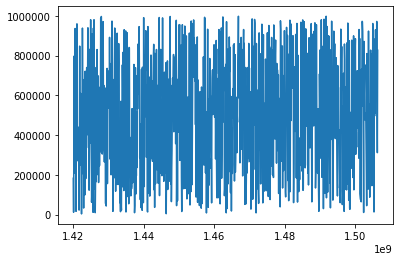

In [2]:
plotter=GsheetPlotter('client_secrets.json')
url=input("Enter your url")
plotter.get_sheet_by_url(url)
sheet=input("Enter name")
plotter.get_worksheet_by_name(sheet)
plotter.plot_graph('timestamp','average_sales')

### ----------NEW CODE-------_#

In [3]:
from gsheets import Sheets
import matplotlib.pyplot as plt
import os.path

In [33]:
class gSheet_plotter(object):
    def __init__(self,client_secret):
        if os.path.exists(client_secret):
            self.sheets=Sheets.from_files(client_secret)
            self.sheet=None
            self.worksheet=None
            print("Client secret validated")
        else:
            print("Invalid Client secret")
            exit(1)
    def access_sheet(self,workbook_url,sheet_name):
        try:
            sheet=self.sheets.get(workbook_url)
            if sheet is None:
                print("Invalid URL or you don't have permission to access spreadsheet.")
                exit(1)
            else:
                print("Sheet successfully loaded.")
                #self.sheet=sheet
        except:
            print("Invalid URL or you don't have permission to access spreadsheet.")
            exit(1)
            
            # Access Workbook now
            
            #_----------Problem Here---_____#
        try:
            worksheet=self.sheet.find(sheet_name)
            print(worksheet)
            try:
                self.worksheet = worksheet.to_frame()
                print("File accessed.")
                #return self.worksheet
            except:
                print("Worksheet with name '{}' has no data to fetch.".format(sheet_name))
                exit(1)
        except:
            print(self.worksheet)
            print("Worksheet with name '{}' does not exist.".format(sheet_name))
            exit(1)
        
        
        
        

In [34]:
test = gSheet_plotter("client_secrets.json")

<IPython.core.display.Javascript object>

Client secret validated


In [35]:
test.access_sheet("https://docs.google.com/spreadsheets/d/1SrZfvr2ee54r7HR1jGtAE9zHIj_Y-UzK9ok8bdwkpqc/edit#gid=0","Sheet1")

Sheet successfully loaded.
None
Worksheet with name 'Sheet1' does not exist.
